## Cat Vs Dogs Using keras and ResNet50

## I. Definition
### Project Overview
Cats and dogs is the most common animal in human houses . Humans love to have cats and dogs to live  , play and take a picture with them . after taking hundreds of photos you may want to category it to cats and dogs photos. 

instead to make it manually we will write an algorithm to classify whether images contain either a dog or a cat. This is easy for humans to classify it but Your computer will find it a bit more difficult.


### Problem Statement
This is a Classification problem that has a lot of label data  as training data and desired output and we required from this data to get new picture and classify if the picture contain cat or dog .

we can divide the projects into parts as following :
1. load the dataset.
2. preprocessing the data such as : (Rescale , Resize , divide the data into validation and training).
3. build the classifer using keras and TensorFlow .
4. training the data using classifer.
5. compare between the models and get the best classifer  model.
6. use the classifer to classify new data.






### Data Preprocessing
1. load the all data from training folder.
2. split it into validation data and training data .
3. divide the data into train (cat , dog) and validation (cat , dog).
4. resize all picture to fixed size (224x224) 
5. rescale all color in images from 0~255 to 0~1

### Implementation
the main steps in my implementation : <br>
- build 3 layers of CNN each layer contain Activation Relu and max poll.<br>
- use flatten to convert our 3D feature to 1D vercor .<br>
- make dropout layer to decrease the overfitting.<br>
- make the last layer dense with size 1 because our output is one number 0 or 1.<br>
- after building the model we fit our dataset on the keras model and get graph of log loss and accuracy.<br>
- build ResNet 50 model . <br>
- first layer will be ResNet 50 .<br>
- second layer is dense layer to get the output and activation softmax.<br>
- trun off training first because it is already trained.<br>
- use optimizers to make it more efficient.<br>
- finally compile our model and fit it with our dataset .<br>
- get the log loss and Accurate and compare it with keras and use the best model to predict the image if it is cat or dog.<br>

### import required package

In [1]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np 
import pandas as pd 
from tqdm import tqdm
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/dogs-vs-cats-redux-kernels-edition"))

# Any results you write to the current directory are saved as output.

['train', 'test']


### fixed number to used in our model

In [2]:
# Cats & Dogs classes
NUM_CLASSES = 2

CHANNELS = 3 #channel for color RGB
IMG_SIZE = 224
TRAIN_DIR = '../input/dogs-vs-cats-redux-kernels-edition/train'
TEST_DIR = '../input/dogs-vs-cats-redux-kernels-edition/test'


BATCH_SIZE_TRAINING = 100
BATCH_SIZE_VALIDATION = 100

BATCH_SIZE_TESTING = 1

## Analysis & preprocessing
loading the data and get all the cat images and dog images to get the size of them

In [3]:
train_filenames = os.listdir(TRAIN_DIR)
cat = [x for x in train_filenames if x[:3] == 'cat']
dog = [x for x in train_filenames if x[:3] == 'dog']

print("training data size for cat is : "+str(len(cat)))
print("training data size for dog is : "+str(len(dog)))
print("test data size is : "+str(len(os.listdir(TEST_DIR))))

training data size for cat is : 12500
training data size for dog is : 12500
test data size is : 12500


we note that there is 12500 of dog and same in cat and testing set as we show in figure below

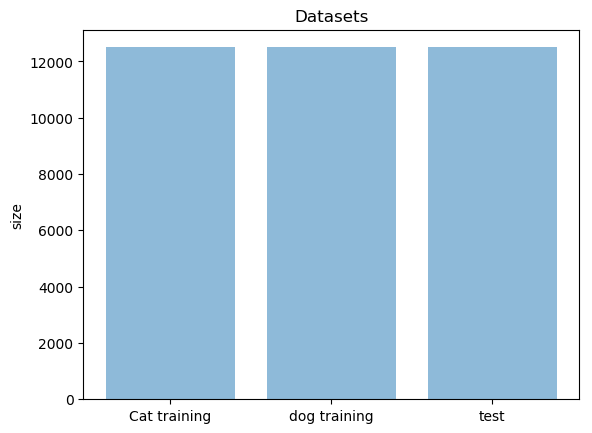

In [4]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('Cat training', 'dog training', 'test')
y_pos = np.arange(len(objects))
performance = [len(cat),len(dog),len(os.listdir(TEST_DIR))]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('size')
plt.title('Datasets')
 
plt.show()

### Splitting the data
 we will split the training data to training (20000) set and validation set (5000)

In [5]:
mytrain, myvalid = train_test_split(train_filenames, test_size=0.2,random_state=10)
print (len(mytrain), len(myvalid))

20000 5000


then we split the data in training set and validation set into cat training , dog training ,cat validation and dog validation.

In [6]:
train_cat = [x for x in mytrain if x[:3] == 'cat']
train_dog = [x for x in mytrain if x[:3] == 'dog']
valid_cat = [x for x in myvalid if x[:3] == 'cat']
valid_dog = [x for x in myvalid if x[:3] == 'dog']
x = ['train_cat', 'train_dog', 'valid_cat', 'valid_dog']
y = [len(train_cat), len(train_dog), len(valid_cat), len(valid_dog)]
print("cat training size : "+str(len(train_cat)))
print("dog training size : "+str(len(train_dog)))

print("cat validation size : "+str(len(valid_cat)))
print("dog validation size : "+str(len(valid_dog)))

cat training size : 9987
dog training size : 10013
cat validation size : 2513
dog validation size : 2487


we find that there are around 2500 of dag and 2500 cat in validation set , 10000 dogs and 10000 cats in training

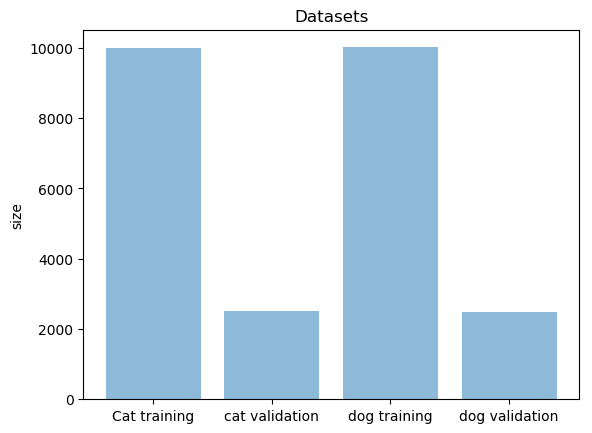

In [7]:

objects = ('Cat training','cat validation' ,'dog training', 'dog validation')
y_pos = np.arange(len(objects))
performance = [len(train_cat),len(valid_cat),len(train_dog),len(valid_dog)]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('size')
plt.title('Datasets')
 
plt.show()

we will split out traininf folder into 2 folder one for training and another for validation , in each folder there will be 2 folder one for cats and another for dogs.

In [8]:
# Create train folder
training_folder='../input/catsdogs-trainvalid-80pc-prepd/trainvalidfull4keras/trainvalidfull4keras/train'
validation_folder ='../input/catsdogs-trainvalid-80pc-prepd/trainvalidfull4keras/trainvalidfull4keras/valid'
if not os.path.exists(training_folder):
    os.makedirs(training_folder)
    os.makedirs(training_folder+'cats')
    os.makedirs(training_folder+'dogs')
    
    for filename in train_cat:
        os.symlink(TRAIN_DIR+filename, training_folder+'/cats/'+filename)

    for filename in train_dog:
        os.symlink(TRAIN_DIR+filename, training_folder+'/dogs/'+filename)
    

# Create validation folder
if not os.path.exists(validation_folder):
    os.makedirs(validation_folder)
    os.makedirs(validation_folder+'cats')
    os.makedirs(validation_folder+'dogs')
    
    for filename in train_cat:
        os.symlink(TRAIN_DIR+filename, validation_folder+'/cats/'+filename)

    for filename in train_dog:
        os.symlink(TRAIN_DIR+filename, validation_folder+'/dogs/'+filename)
    
    
    


## Implentation 

we will build our keras model and we will make the classifer is binary as we will show below :

In [9]:
# MODEL
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
# MODEL
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
# COMPILE
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 64)        18496     
__________

we will load the training and validation data from folders and fit the model and we will make the class is binary

In [11]:
# Part 2 - Fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
train_set = train_datagen.flow_from_directory(training_folder,
target_size = (224, 224),
batch_size = 32,
class_mode = 'binary')
test_set = test_datagen.flow_from_directory(validation_folder,
target_size = (224, 224),
batch_size = 32,
class_mode = 'binary')
history = model.fit_generator(train_set,
steps_per_epoch = 1000,
epochs = 5,
validation_data = test_set,
validation_steps = 2000)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/5
1000/1000 [==============================] - 712s 712ms/step - loss: 0.5411 - acc: 0.7354 - val_loss: 0.4985 - val_acc: 0.7752
Epoch 2/5
1000/1000 [==============================] - 697s 697ms/step - loss: 0.4820 - acc: 0.7802 - val_loss: 0.4407 - val_acc: 0.7906
Epoch 3/5
1000/1000 [==============================] - 699s 699ms/step - loss: 0.4591 - acc: 0.7942 - val_loss: 0.4219 - val_acc: 0.8119
Epoch 4/5
1000/1000 [==============================] - 695s 695ms/step - loss: 0.4449 - acc: 0.8045 - val_loss: 0.3955 - val_acc: 0.8175
Epoch 5/5
1000/1000 [==============================] - 696s 696ms/step - loss: 0.4232 - acc: 0.8166 - val_loss: 0.3883 - val_acc: 0.8321


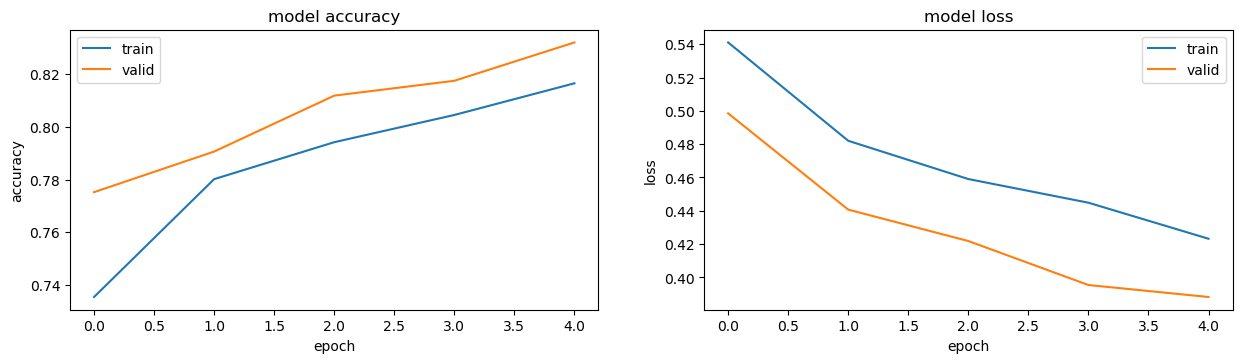

In [12]:
 plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()

as we show above the loss log : 0.4232 and  accurracy : 0.8166.<br>
we will try to use another technology to make good accuracy above 90%.

### ResNet50
* Notice that resnet50 folder has 2 pre-trained weights files... xyz_tf_kernels.h5 & xyz_tf_kernels_NOTOP.h5
* The xyz_tf_kernels.h5 weights is useful for pure prediction of test image and this prediction will rely completely on ResNet50 pre-trained weights, i.e., it does not expected any training from our side


### Define Our Model
in this model we will make dense 2 because we will try to make class mode is categorical instead binary.

In [13]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

resnet_weights_path = '../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

model2 = Sequential()

# 1st layer as the lumpsum weights from resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
# NOTE that this layer will be set below as NOT TRAINABLE, i.e., use it as is
model2.add(ResNet50(include_top = False, pooling = 'avg', weights = resnet_weights_path))

# 2nd layer as Dense for 2-class classification, i.e., dog or cat using SoftMax activation
model2.add(Dense(NUM_CLASSES, activation = 'softmax'))

# Say not to train first layer (ResNet) model as it is already trained
model2.layers[0].trainable = False

In [14]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


### Compile Our model and Optimize

In [15]:
from tensorflow.python.keras import optimizers

sgd = optimizers.SGD(lr = 1e-3, decay = 1e-6, momentum = 0.9, nesterov = True)
model2.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

### load and fitting the data

we will load the training data and test data with different class mode as following and fitting out model.

In [17]:
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator


data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)


train_generator = data_generator.flow_from_directory(
        training_folder,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE_TRAINING,
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        validation_folder,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE_VALIDATION,
        class_mode='categorical') 

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


load the weights of our model.

In [ ]:
# Early stopping & checkpointing the best model in ../working dir & restoring that as our model for prediction
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = 3)
cb_checkpointer = ModelCheckpoint(filepath = '../working/best.hdf5', monitor = 'val_loss', save_best_only = True, mode = 'auto')



fitting and load our model

In [21]:
fit_history = model2.fit_generator(
        train_generator,
        steps_per_epoch=10,
        epochs = 10,
        validation_data=validation_generator,
        validation_steps=10,
        callbacks=[cb_checkpointer, cb_early_stopper]


)
model2.load_weights("../working/bestModel.hdf5")

Epoch 1/10
10/10 [==============================] - 23s 2s/step - loss: 0.6304 - acc: 0.6810 - val_loss: 0.3066 - val_acc: 0.8900
Epoch 2/10
10/10 [==============================] - 15s 2s/step - loss: 0.2738 - acc: 0.9020 - val_loss: 0.1572 - val_acc: 0.9470
Epoch 3/10
10/10 [==============================] - 16s 2s/step - loss: 0.1736 - acc: 0.9420 - val_loss: 0.1066 - val_acc: 0.9670
Epoch 4/10
10/10 [==============================] - 16s 2s/step - loss: 0.1172 - acc: 0.9770 - val_loss: 0.1023 - val_acc: 0.9650
Epoch 5/10
10/10 [==============================] - 16s 2s/step - loss: 0.0979 - acc: 0.9770 - val_loss: 0.0851 - val_acc: 0.9710
Epoch 6/10
10/10 [==============================] - 16s 2s/step - loss: 0.1160 - acc: 0.9580 - val_loss: 0.0709 - val_acc: 0.9810
Epoch 7/10
10/10 [==============================] - 15s 2s/step - loss: 0.1058 - acc: 0.9590 - val_loss: 0.0748 - val_acc: 0.9760
Epoch 8/10
10/10 [==============================] - 16s 2s/step - loss: 0.0982 - acc: 0.96

### Result 

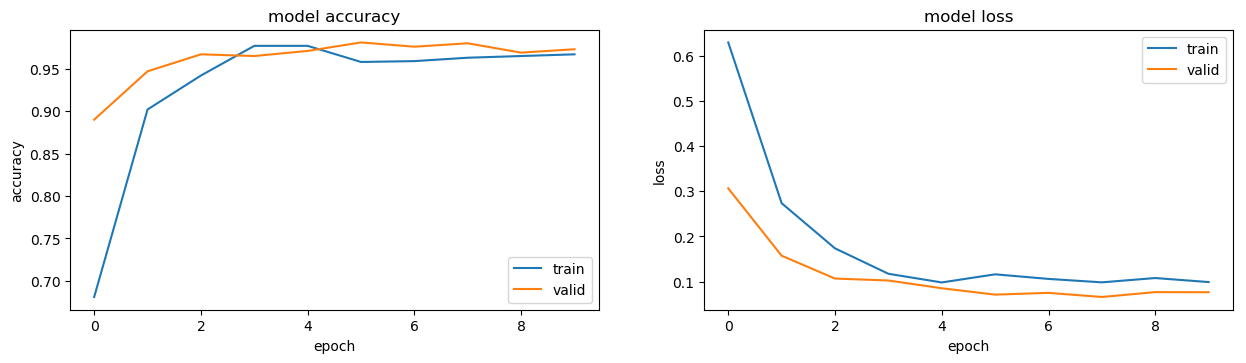

In [23]:
 plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(fit_history.history['acc'])  
plt.plot(fit_history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(fit_history.history['loss'])  
plt.plot(fit_history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()

In [25]:

test_generator = data_generator.flow_from_directory(
    directory = '../input/test-files-prepd/test4keras/test4keras',
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE_TESTING,
    class_mode = None,
    shuffle = False,
    seed = 123
)

Found 12500 images belonging to 1 classes.


'\nfor i in test_generator:\n    #print(test_generator.batch_index, test_generator.batch_size)\n    idx = (test_generator.batch_index - 1) * test_generator.batch_size\n    print(test_generator.filenames[idx : idx + test_generator.batch_size])\n'

## testing
we will test our data on random set of images  in our testing set

In [26]:
test_generator.reset()

pred = model.predict_generator(test_generator, steps = len(test_generator), verbose = 1)

predicted_class_indices = np.argmax(pred, axis = 1)

12500/12500 [==============================] - 261s 21ms/step


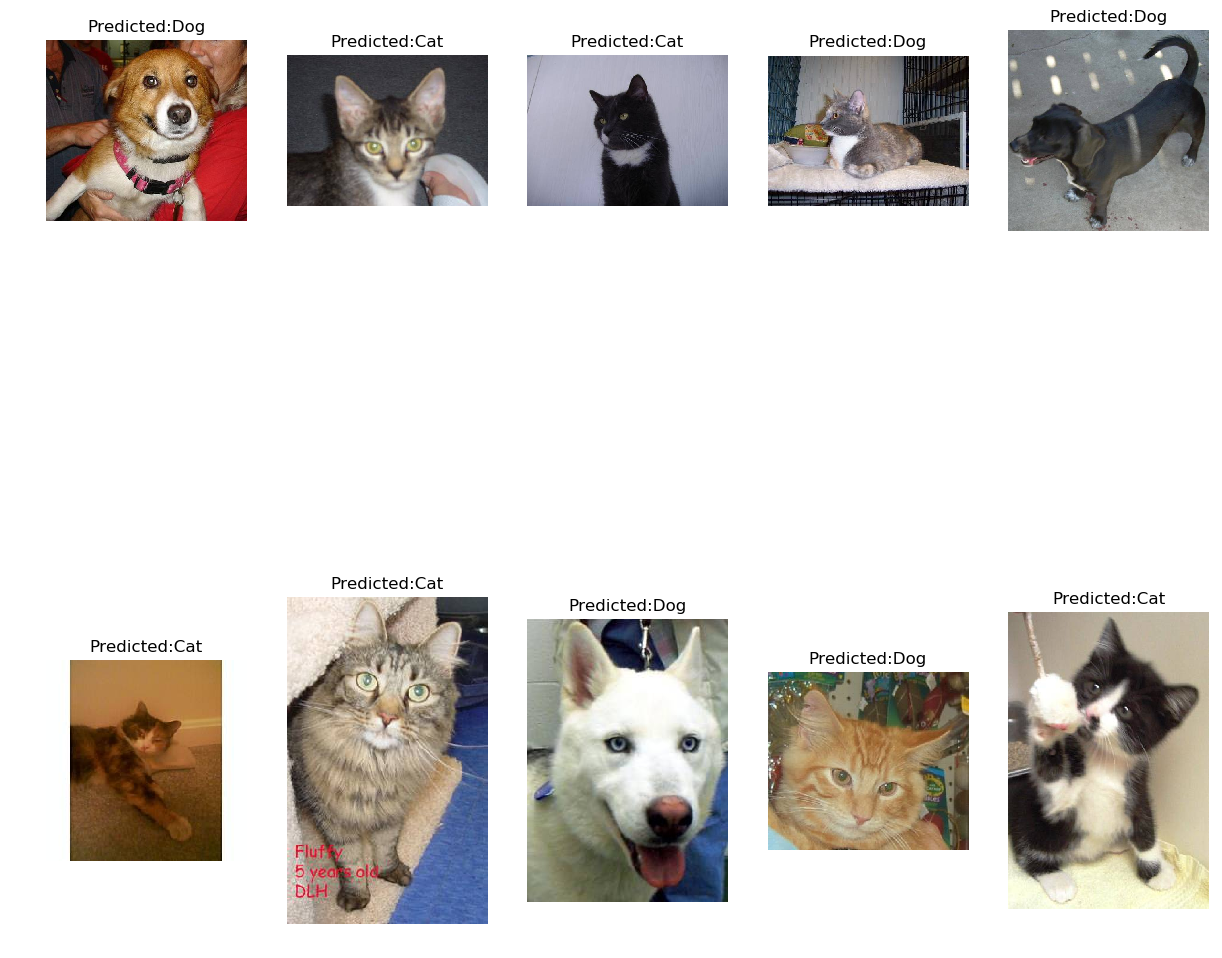

In [53]:
TEST_DIR = '../input/test-files-prepd/test4keras/test4keras/'
f, ax = plt.subplots(2, 5, figsize = (15, 15))
from random import shuffle

shuffle(test_generator.filenames)
for i in range(0,10):
    imgBGR = cv2.imread(TEST_DIR + test_generator.filenames[i])
    imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
    
    predicted_class = "Dog" if predicted_class_indices[i] else "Cat"

    ax[i//5, i%5].imshow(imgRGB)
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_title("Predicted:{}".format(predicted_class))    

plt.show()

as we get there is 2 from 10 but it is acceptable.